In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/finalRepoRate.csv')
df.head()

,Unnamed: 0,Date,GoldPrice,BankRate,CrudeOilRate,RepoRate,UsdInr
0,0,2001-04-02,256.0,7.0,25.70,9.0,46.65
1,1,2001-04-03,257.1,7.0,26.65,9.0,46.67
2,2,2001-04-04,259.5,7.0,27.16,9.0,46.60
3,3,2001-04-05,258.1,7.0,27.24,9.0,46.64
4,4,2001-04-06,258.8,7.0,27.07,9.0,46.58


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Date,GoldPrice,BankRate,CrudeOilRate,RepoRate,UsdInr
0,2001-04-02,256.0,7.0,25.70,9.0,46.65
1,2001-04-03,257.1,7.0,26.65,9.0,46.67
2,2001-04-04,259.5,7.0,27.16,9.0,46.60
3,2001-04-05,258.1,7.0,27.24,9.0,46.64
4,2001-04-06,258.8,7.0,27.07,9.0,46.58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5961 non-null   object 
 1   GoldPrice     5961 non-null   float64
 2   BankRate      5961 non-null   float64
 3   CrudeOilRate  5961 non-null   float64
 4   RepoRate      5961 non-null   float64
 5   UsdInr        5961 non-null   float64
dtypes: float64(5), object(1)
memory usage: 279.5+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5961 non-null   datetime64[ns]
 1   GoldPrice     5961 non-null   float64       
 2   BankRate      5961 non-null   float64       
 3   CrudeOilRate  5961 non-null   float64       
 4   RepoRate      5961 non-null   float64       
 5   UsdInr        5961 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 279.5 KB


### Get Monthly Data

In [ ]:
df.set_index('Date', inplace=True, drop=True)
df.head()

,GoldPrice,BankRate,CrudeOilRate,RepoRate,UsdInr
Date,,,,,
2001-04-02,256.0,7.0,25.70,9.0,46.65
2001-04-03,257.1,7.0,26.65,9.0,46.67
2001-04-04,259.5,7.0,27.16,9.0,46.60
2001-04-05,258.1,7.0,27.24,9.0,46.64
2001-04-06,258.8,7.0,27.07,9.0,46.58


In [ ]:
df = df.resample('M').last()
df.head()

,GoldPrice,BankRate,CrudeOilRate,RepoRate,UsdInr
Date,,,,,
2001-04-30,263.2,7.0,28.48,9.00,46.88
2001-05-31,267.5,7.0,28.39,8.75,47.00
2001-06-30,270.6,7.0,26.37,8.50,47.09
2001-07-31,265.9,7.0,26.70,8.50,47.18
2001-08-31,273.0,7.0,26.65,8.50,47.17


In [ ]:
df.shape

(275, 5)

In [ ]:
df.tail()

,GoldPrice,BankRate,CrudeOilRate,RepoRate,UsdInr
Date,,,,,
2023-10-31,1996.9,6.75,81.64,6.5,83.26
2023-11-30,2035.5,6.75,75.66,6.5,83.36
2023-12-31,2078.4,6.75,71.89,6.5,83.19
2024-01-31,2053.3,6.75,76.28,6.5,83.02
2024-02-29,2034.2,6.75,72.72,6.5,82.92


In [ ]:
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
def transforms(data):
  tr = 1/data
  ts = data**(1/2)
  tl = np.log1p(data)
  tb, l = boxcox(data)

  trs = tr**(1/2)
  trl = np.log1p(tr)
  trb, lrb = boxcox(tr)

  tsl = np.log1p(ts)
  tsb, lsb = boxcox(ts)

  tlb, llb = boxcox(tl)

  plots = {'original': data, 'reci': tr, 'sqrt': ts, 'log': tl, 'boxcox':tb, 'reci-sqrt': trs, 'reci-log': trl, 'reci-box': trb, 'sqrt-log':tsl, 'sqrt-box':tsb, 'log-box': tlb}
  fig, ax = plt.subplots(11, 2, figsize=(15,30))

  for i, name in enumerate(plots.keys()):
    sns.distplot(plots[name], ax=ax[i,0])
    ax[i,0].set_ylabel(name)
    sm.qqplot(plots[name], line='q', ax=ax[i, 1])
    ax[i,1].set_ylabel(name)
  plt.show()

<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

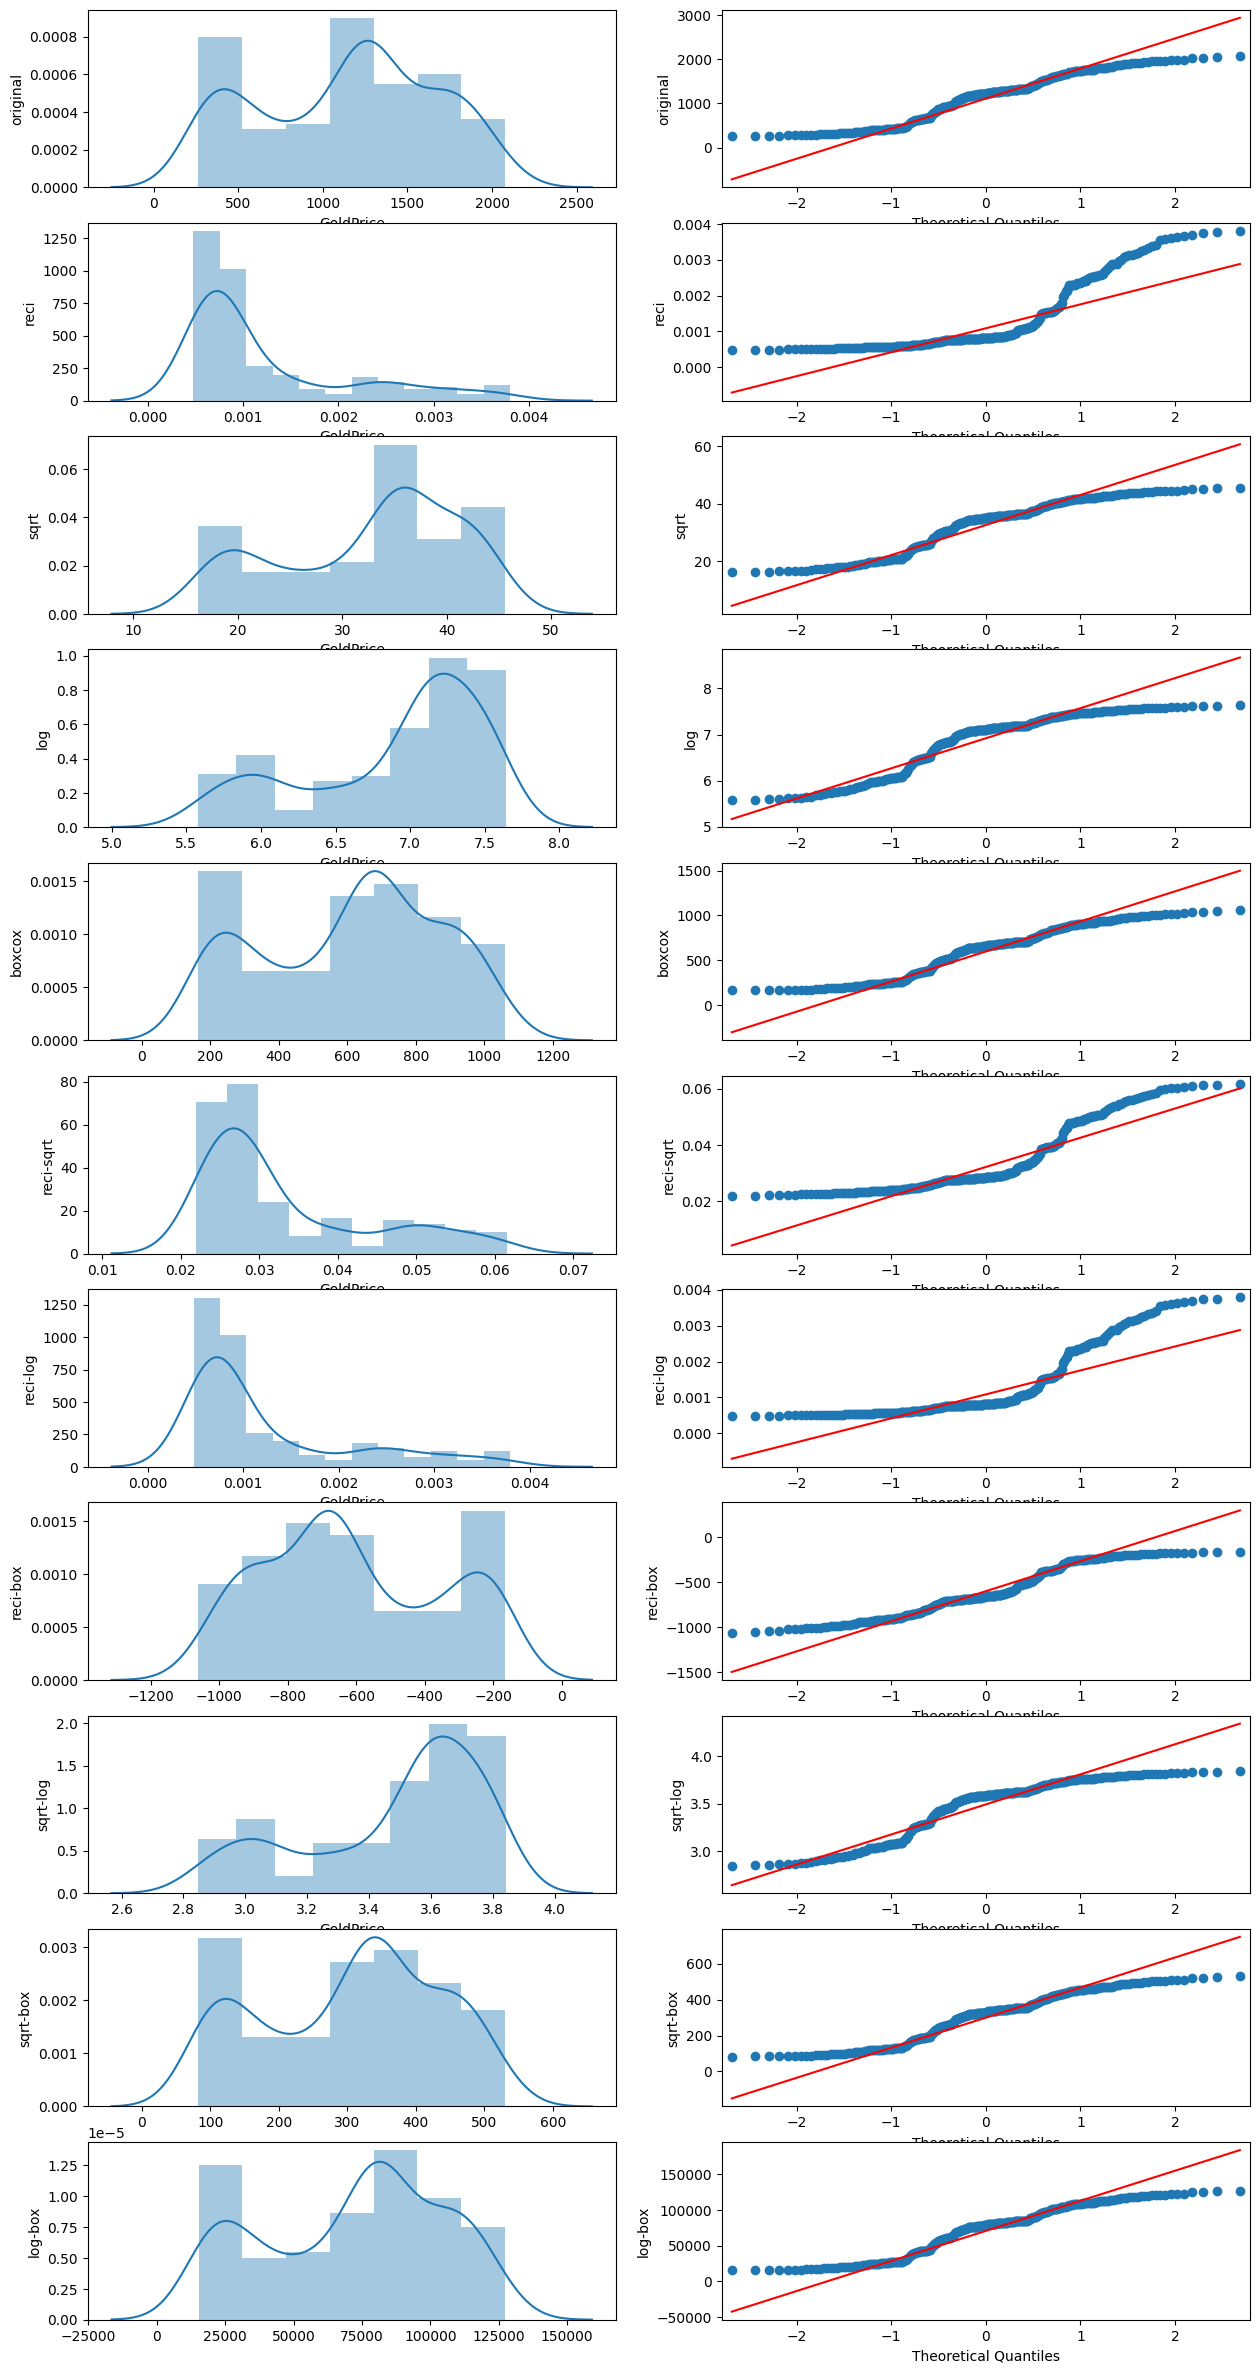

In [ ]:
transforms(df['GoldPrice'])

#### Log transformation is close to normal distribution

<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

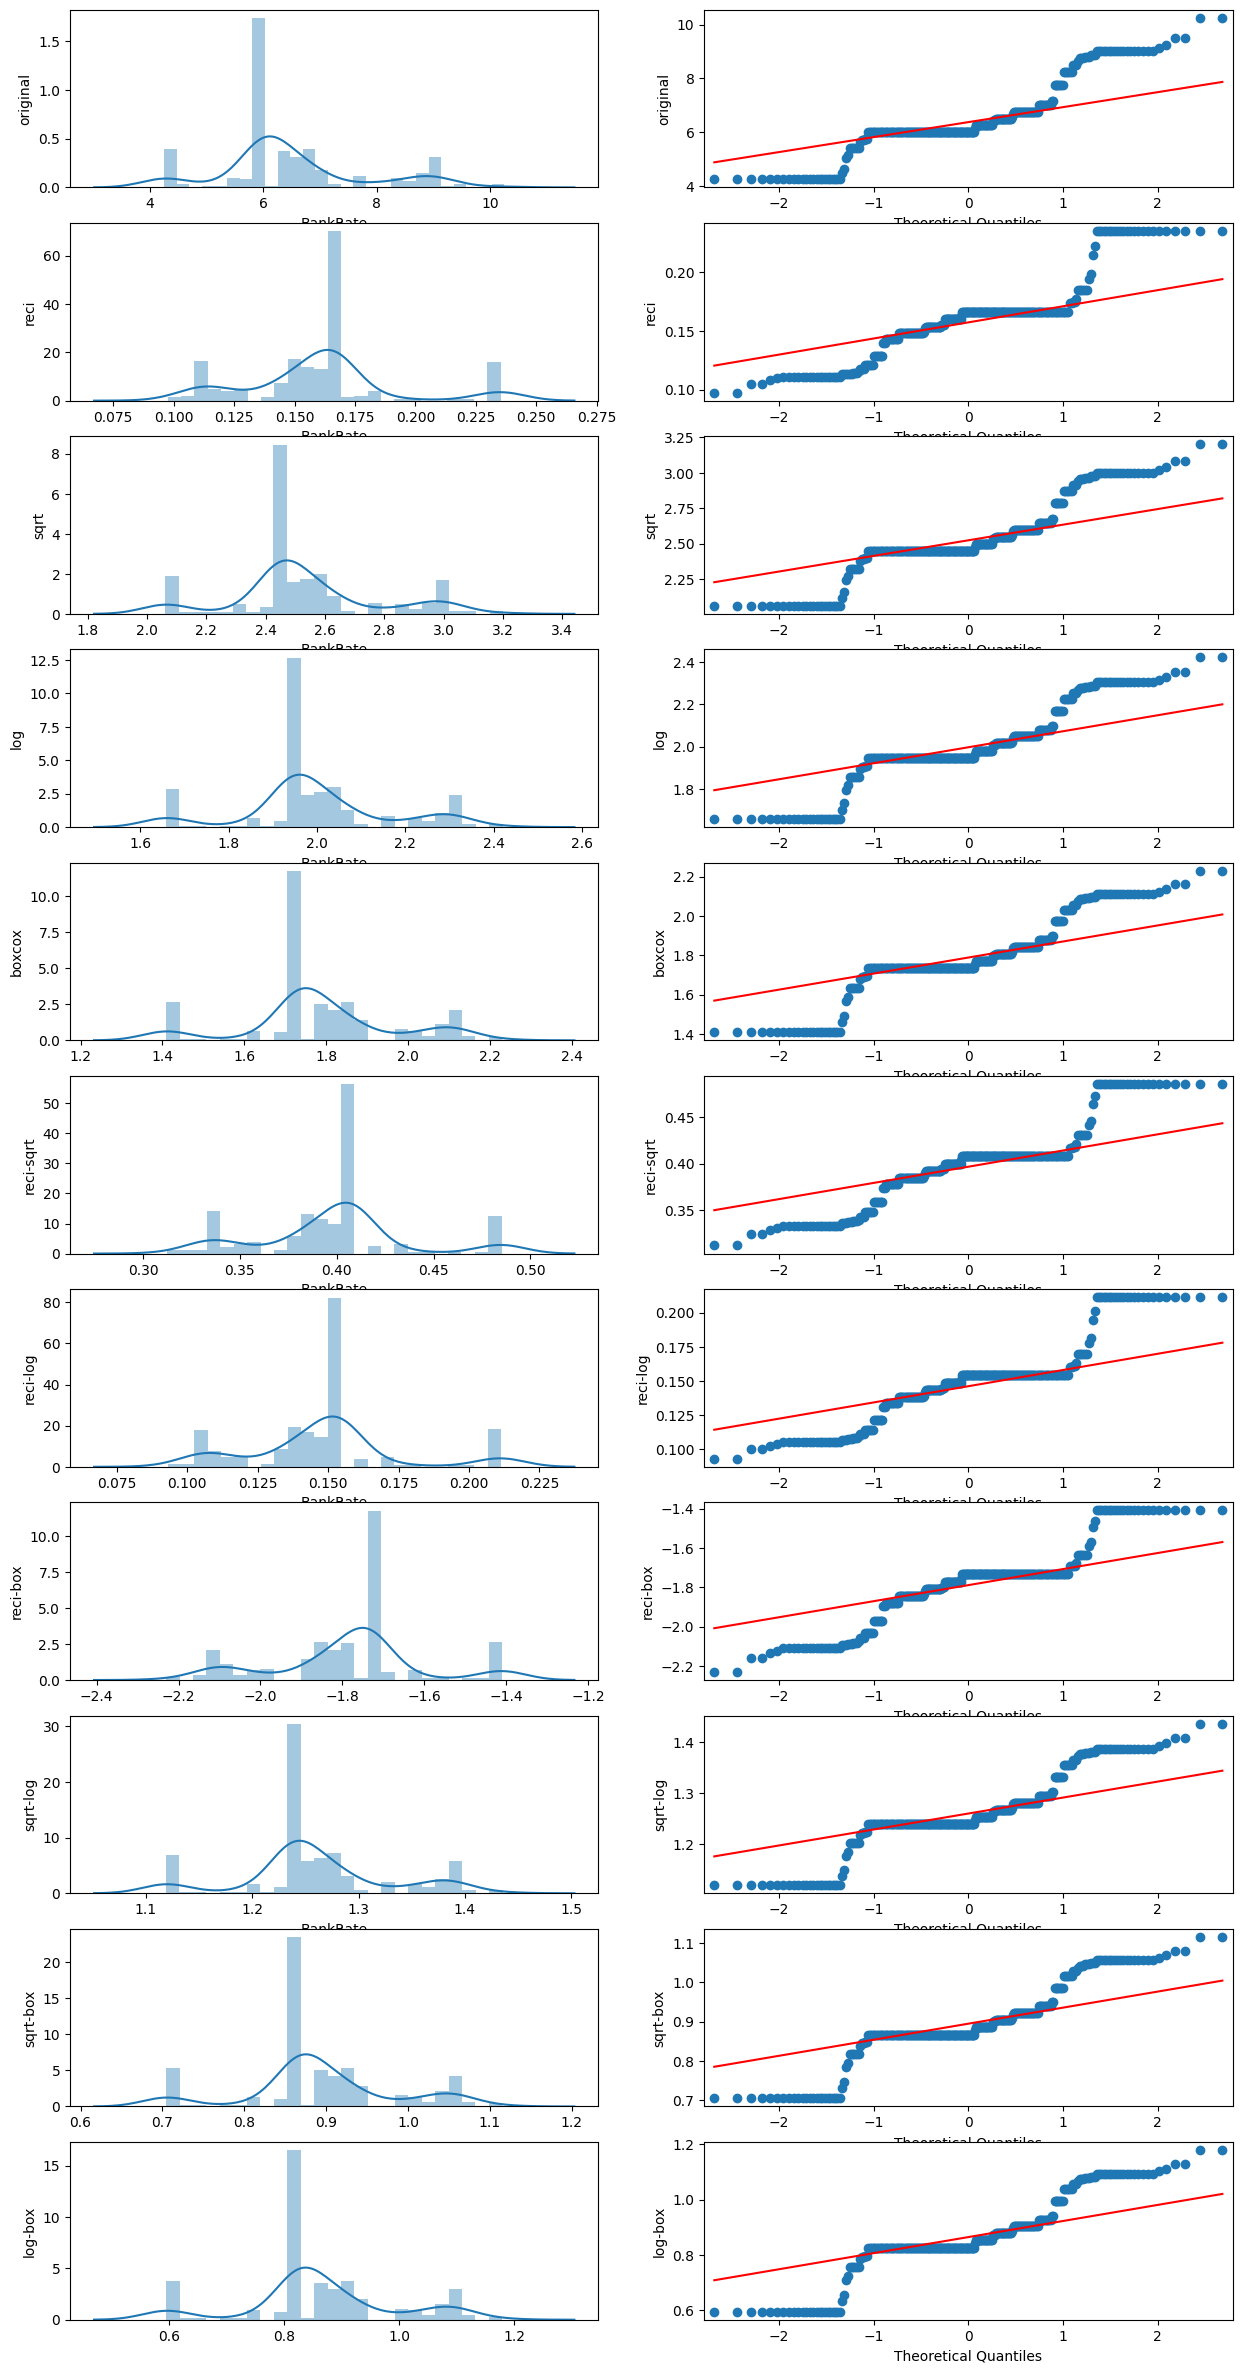

In [ ]:
transforms(df['BankRate'])

<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

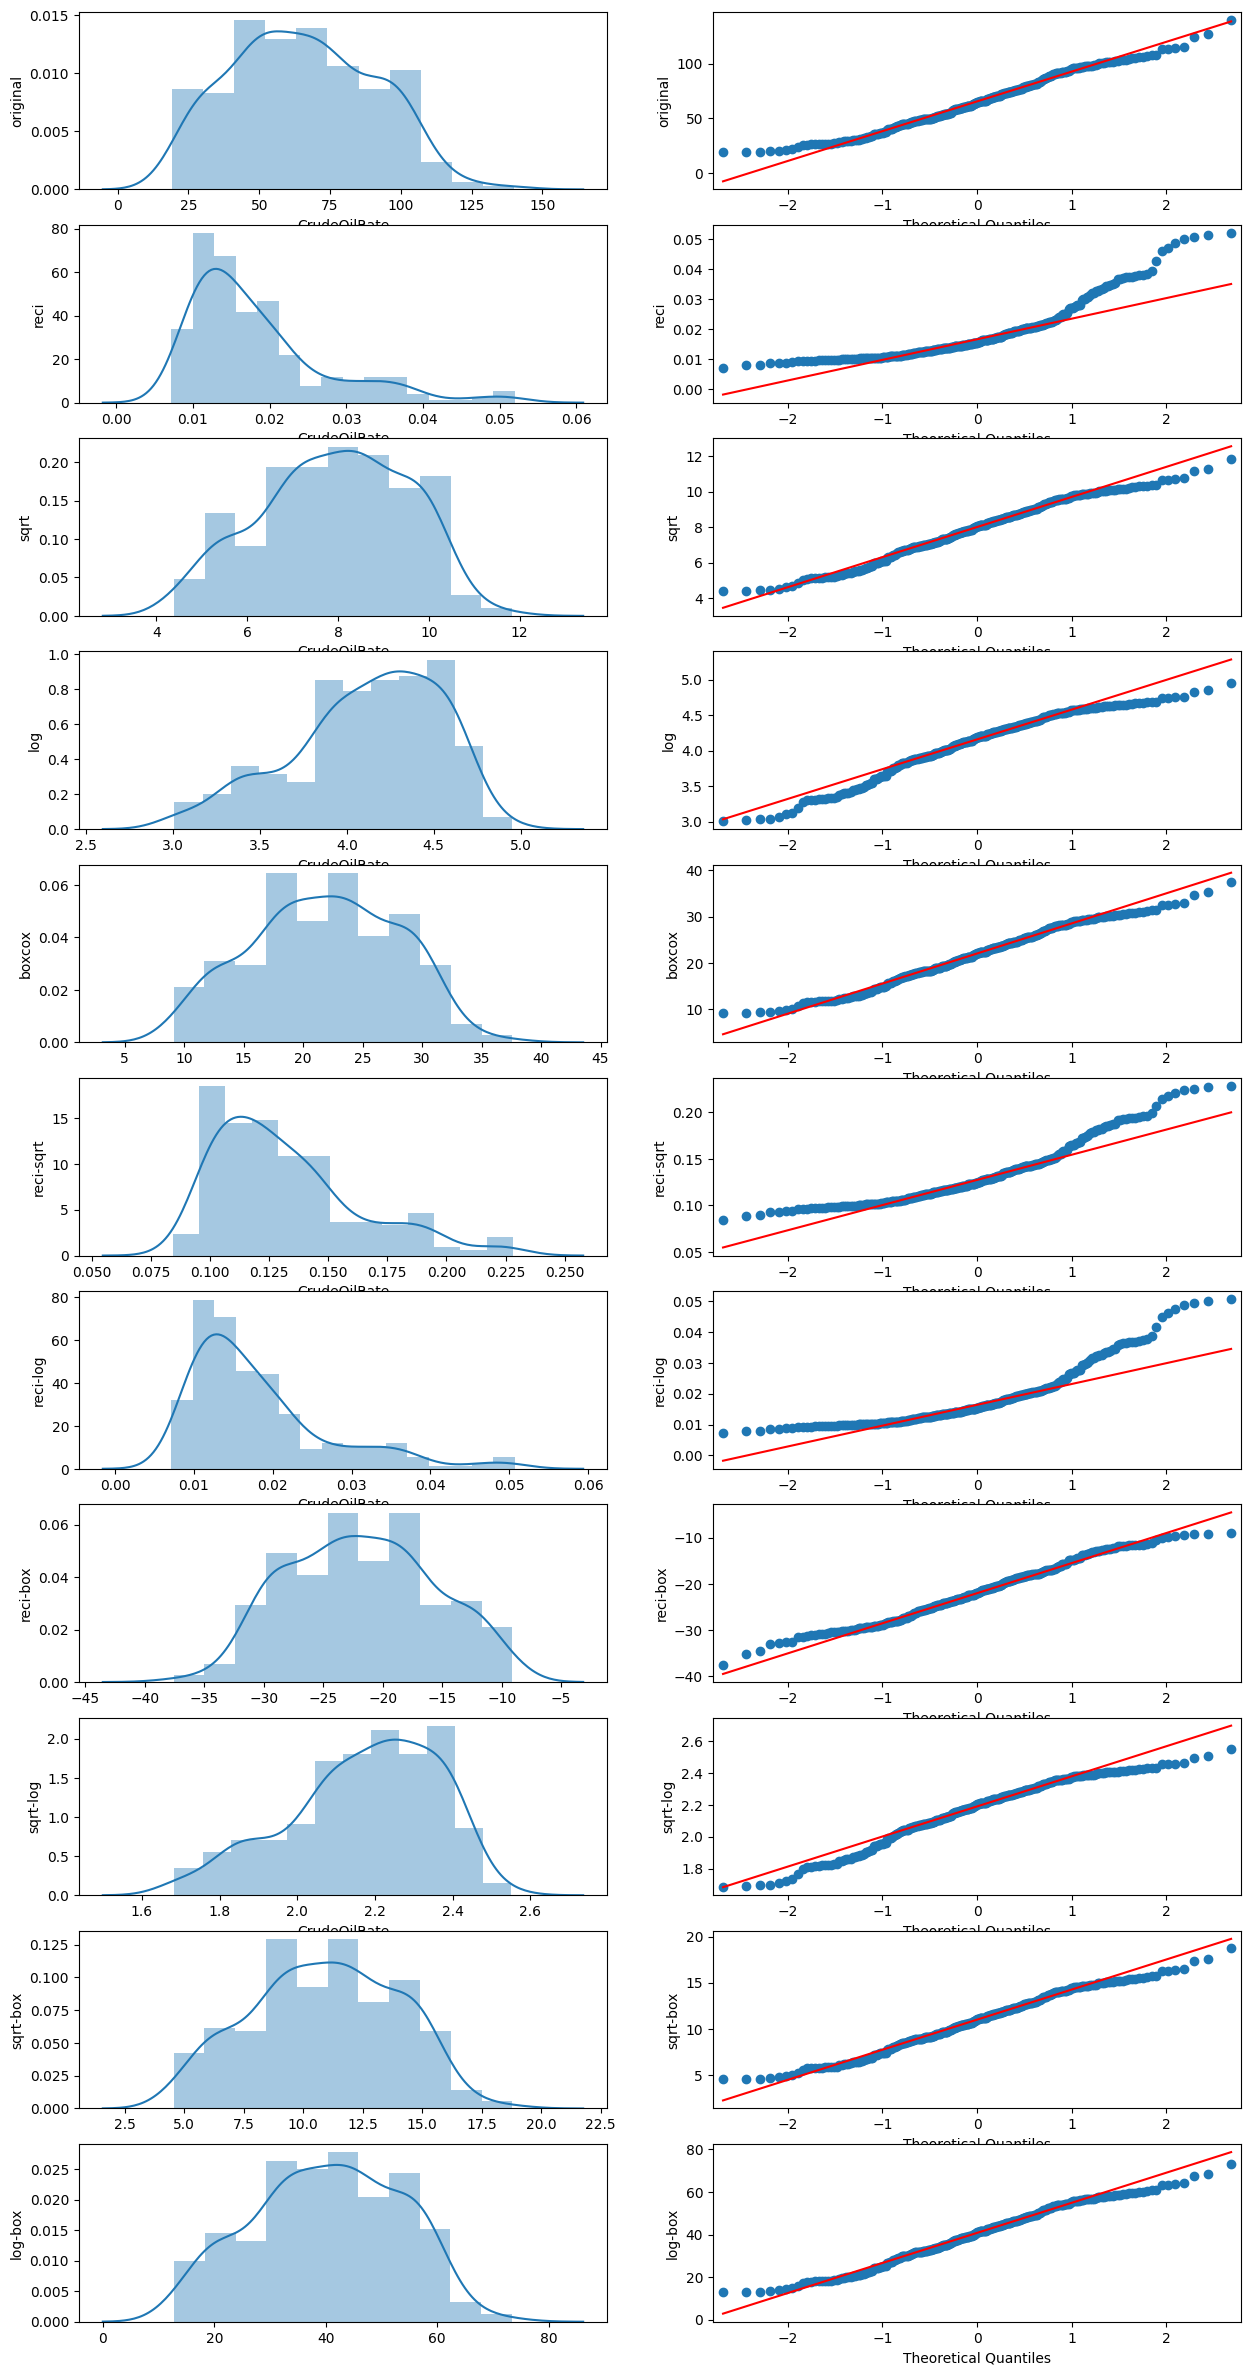

In [ ]:
transforms(df['CrudeOilRate'])

#### BOXCOX is silimal to normal Dristribution for CrudeOilPrice

<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plots[name], ax=ax[i,0])
<ipython-input-20-b3eb424efbca>:20: UserWarning: 

`distplot` is a deprecated func

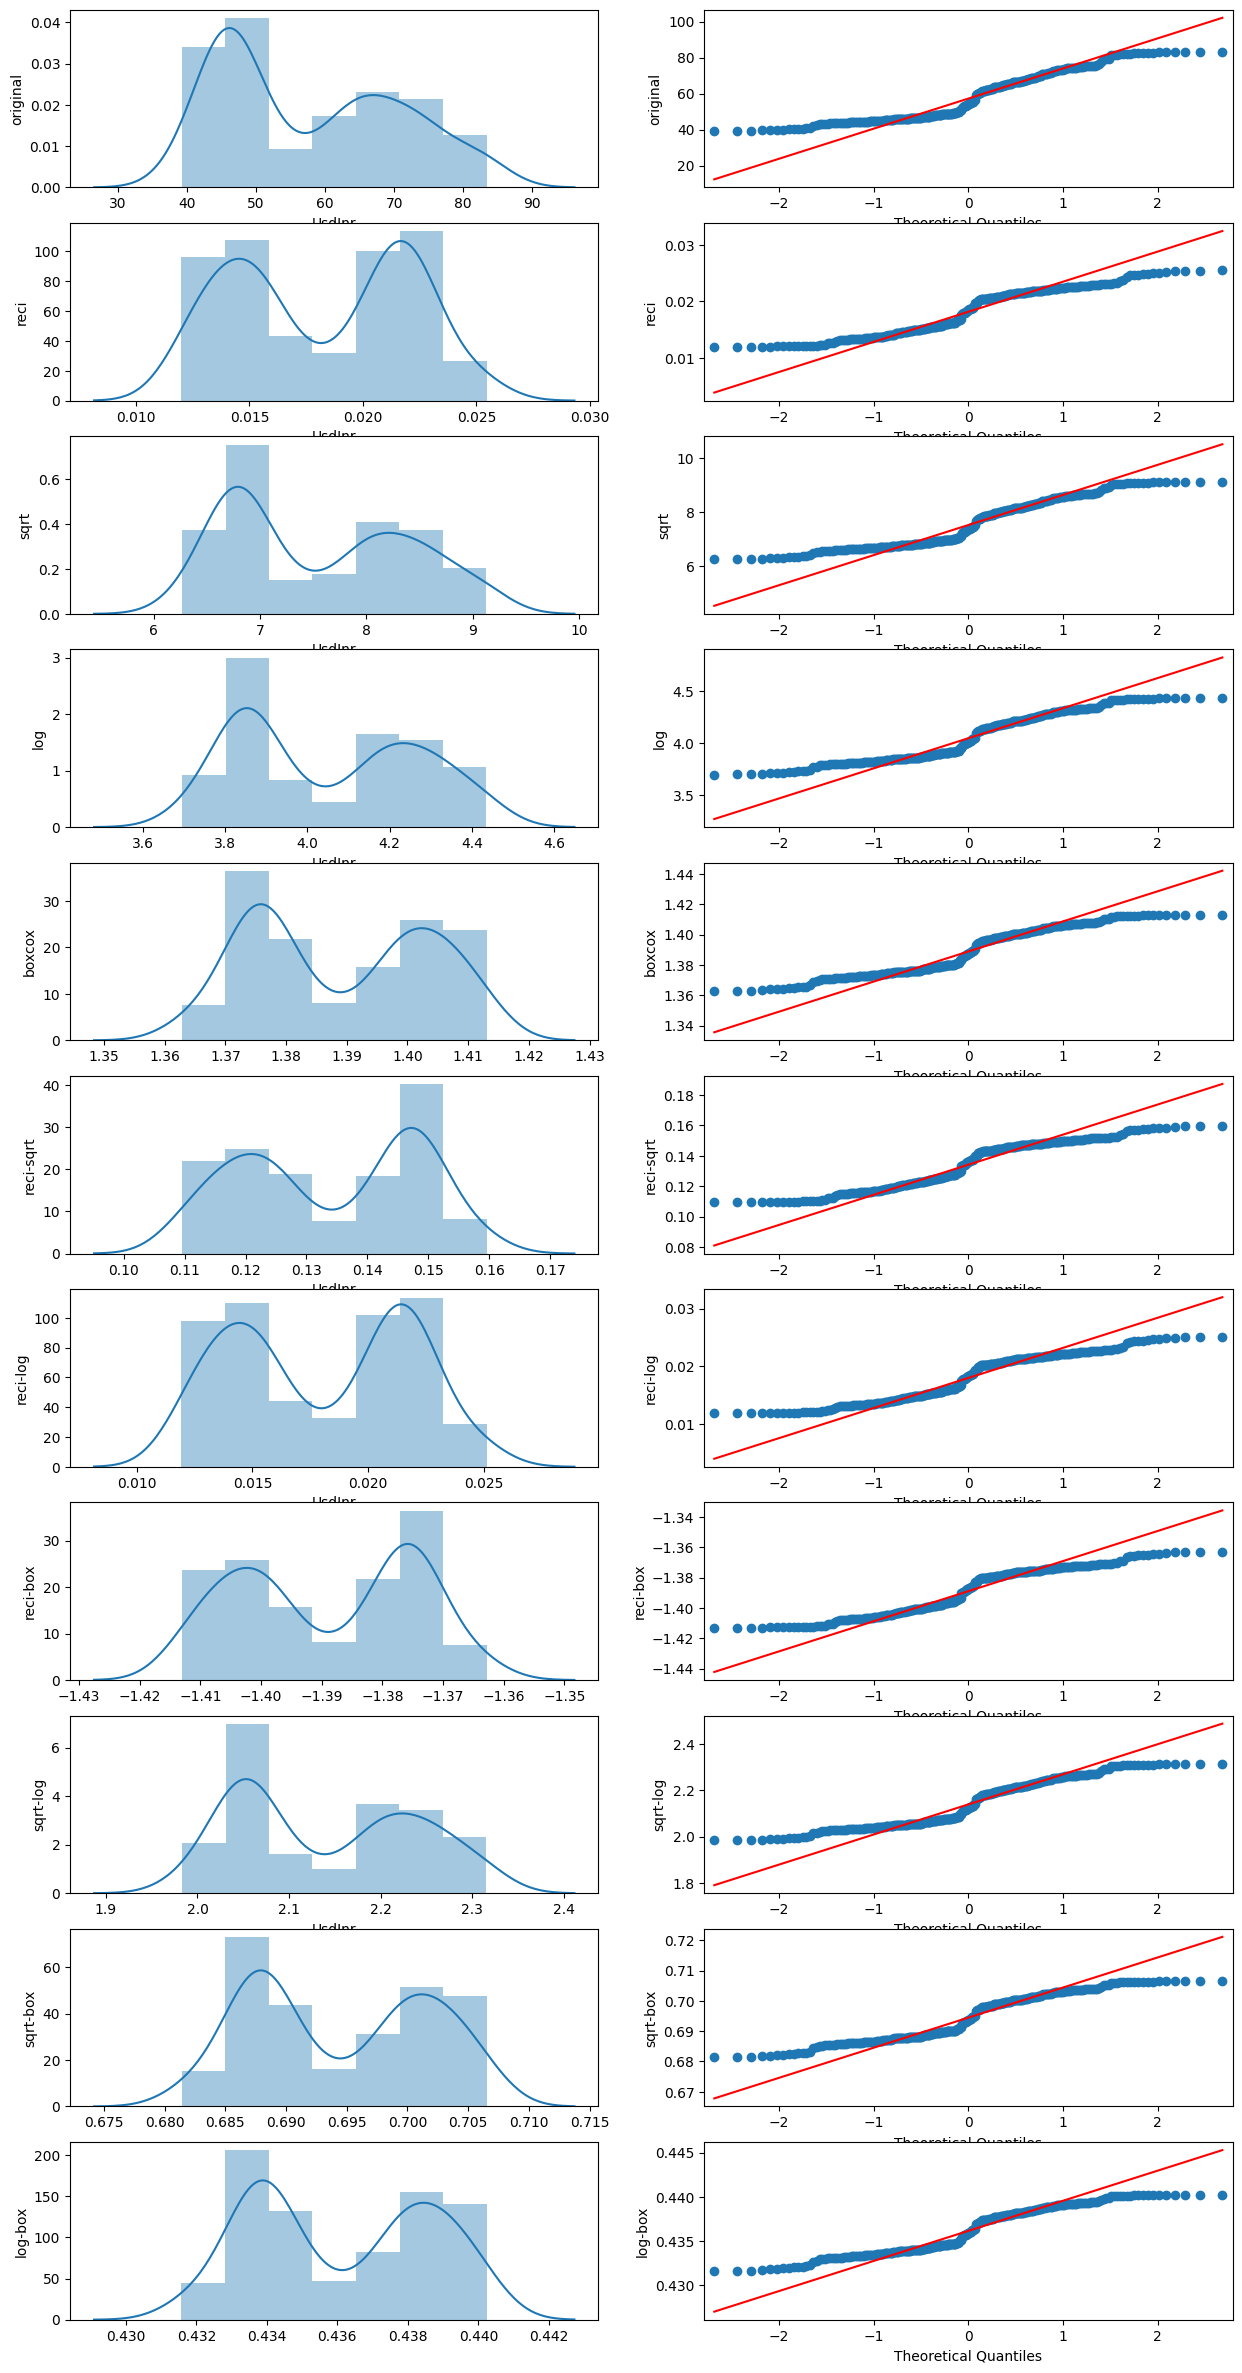

In [ ]:
transforms(df['UsdInr'])

### Transformation

In [ ]:
df['GoldPrice'] = np.log1p(df['GoldPrice'])
df['CrudeOilRate'], l = boxcox(df['CrudeOilRate'])

In [ ]:
X= df[['GoldPrice','BankRate','CrudeOilRate', 'UsdInr']]
y=  df['RepoRate']

In [ ]:
prev_repoRate = y.shift(1)
X['PreviousRepoRate'] = prev_repoRate

In [ ]:
X.head()

,GoldPrice,BankRate,CrudeOilRate,UsdInr,PreviousRepoRate
Date,,,,,
2001-04-30,5.576706,7.0,12.220377,46.88,NaN
2001-05-31,5.592851,7.0,12.191830,47.00,9.00
2001-06-30,5.604330,7.0,11.542670,47.09,8.75
2001-07-31,5.586874,7.0,11.649857,47.18,8.50
2001-08-31,5.613128,7.0,11.633646,47.17,8.50


In [ ]:
X['PreviousRepoRate'][0] = 9
X.head()

,GoldPrice,BankRate,CrudeOilRate,UsdInr,PreviousRepoRate
Date,,,,,
2001-04-30,5.576706,7.0,12.220377,46.88,9.00
2001-05-31,5.592851,7.0,12.191830,47.00,9.00
2001-06-30,5.604330,7.0,11.542670,47.09,8.75
2001-07-31,5.586874,7.0,11.649857,47.18,8.50
2001-08-31,5.613128,7.0,11.633646,47.17,8.50


In [ ]:
print(X.shape)

print(y.shape)

(275, 5)
(275,)


In [ ]:
import math
train_size=0.9
train_len = math.ceil(df.shape[0]*train_size)
train_len

248

In [ ]:
X_train = X.iloc[0:train_len, :]
y_train = y.iloc[0:train_len]

X_test = X.iloc[train_len:, :]
y_test = y.iloc[train_len:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(248, 5)
(248,)
(27, 5)
(27,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
enet = ElasticNet(alpha=0.5, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [ ]:
y_pred = enet.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.21468624662466776


In [ ]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.7911537143265707

In [ ]:
def predictFuture(model):
  preds = []
  for i in range(test_size):
    xt = X_test[i]
    if i != 0:
      tmp = xt
      tmp[-1] = preds[-1]
      tmp = sc.transform(tmp.reshape(1, -1))
      xt[-1] = tmp[0][-1]
    p = model.predict(xt.reshape(1,-1))
    preds.append(p)
  rms = np.sqrt(mean_squared_error(y_true=y_test, y_pred=preds))
  r2 = r2_score(y_true=y_test, y_pred=preds)
  return rms, r2

In [ ]:
from sklearn.model_selection import GridSearchCV
def evaluate_models(X_train,y_train, X_test,y_test, models:dict, params:dict):

  model_keys = models.keys()
  report = {}

  for model_name in model_keys:

    print(f'Training {model_name}')
    model = models[model_name]
    parameters = params[model_name]

    # GridSearchCV will get best hypermaters for each model
    gs = GridSearchCV(estimator=model, param_grid=parameters, cv=3, refit=True)
    gs.fit(X_train, y_train)

    # now test the model with training data

    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)
    rms, test_model_score = predictFuture(model)

    y_train_pred = model.predict(X_train)
    train_model_score = r2_score(y_train, y_train_pred)
    report[model_name] = {
        'model' : model,
        'R2_score_test' : test_model_score,
        'R2_score_train' : train_model_score,
        'best_params': gs.best_params_
    }
    print(f'Model Evaluation report: \n{report}')
  return report

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
models = {
            "Random Forest": RandomForestRegressor(),
            "Elastic Net": ElasticNet(max_iter=1000000),
            "XGBRegressor": XGBRegressor(),
            "AdaBoost Regressor": AdaBoostRegressor(),
            "Gradient Boosting": GradientBoostingRegressor(),
        }

In [ ]:
params = {

    "Random Forest":{
                    'max_features':['sqrt','log2','None'],
                    'n_estimators': [4,8,16,32,64,128,256],
                    'max_depth':[3,5,7,9],
                    'n_jobs':[-1]
                },
    "Elastic Net": {
        'alpha':[0.9, 1, 5],
        'l1_ratio':[0.8,1],
        #'tol': [0.01, 0.1]
    },
    "Gradient Boosting":{
        # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate':[.1,.01,.05,.001],
        'subsample':[0.75,0.8,0.85,0.9],
        # 'criterion':['squared_error', 'friedman_mse'],
        'max_features':['sqrt','log2'],
        'n_estimators': [32,64,128,256, 512],
        'max_depth':[3,5,6],
    },
    "XGBRegressor":{
        'learning_rate':[.01,.05,.001],
        'n_estimators': [32,64,128,256],
        'max_depth':[3,5,10],
        'n_jobs':[-1]
    },
    "AdaBoost Regressor":{
        'learning_rate':[.1,.01,0.5,.001],
        #'loss':['linear','square','exponential'],
        'n_estimators': [8,16,32,64,128,256],
    }
}

In [ ]:
evaluate_models(X_train,y_train, X_test,y_test, models, params)

Training Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
84 fits failed out of a total of 252.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Model Evaluation report: 
{'Random Forest': {'model': RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=16,
                      n_jobs=-1), 'R2_score_test': 0.933356009330865, 'R2_score_train': 0.9198270826776287, 'best_params': {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 16, 'n_jobs': -1}}}
Training Elastic Net
Model Evaluation report: 
{'Random Forest': {'model': RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=16,
                      n_jobs=-1), 'R2_score_test': 0.933356009330865, 'R2_score_train': 0.9198270826776287, 'best_params': {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 16, 'n_jobs': -1}}, 'Elastic Net': {'model': ElasticNet(alpha=0.9, l1_ratio=0.8, max_iter=1000000), 'R2_score_test': -0.6380811717007631, 'R2_score_train': 0.5807353928234089, 'best_params': {'alpha': 0.9, 'l1_ratio': 0.8}}}
Training XGBRegressor


<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp[-1] = preds[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp[-1] = preds[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 

Model Evaluation report: 
{'Random Forest': {'model': RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=16,
                      n_jobs=-1), 'R2_score_test': 0.933356009330865, 'R2_score_train': 0.9198270826776287, 'best_params': {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 16, 'n_jobs': -1}}, 'Elastic Net': {'model': ElasticNet(alpha=0.9, l1_ratio=0.8, max_iter=1000000), 'R2_score_test': -0.6380811717007631, 'R2_score_train': 0.5807353928234089, 'best_params': {'alpha': 0.9, 'l1_ratio': 0.8}}, 'XGBRegressor': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_thres

<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp[-1] = preds[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp[-1] = preds[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 

Model Evaluation report: 
{'Random Forest': {'model': RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=16,
                      n_jobs=-1), 'R2_score_test': 0.933356009330865, 'R2_score_train': 0.9198270826776287, 'best_params': {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 16, 'n_jobs': -1}}, 'Elastic Net': {'model': ElasticNet(alpha=0.9, l1_ratio=0.8, max_iter=1000000), 'R2_score_test': -0.6380811717007631, 'R2_score_train': 0.5807353928234089, 'best_params': {'alpha': 0.9, 'l1_ratio': 0.8}}, 'XGBRegressor': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_thres

<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp[-1] = preds[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp[-1] = preds[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 

{'Random Forest': {'model': RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=16,
                        n_jobs=-1),
  'R2_score_test': 0.933356009330865,
  'R2_score_train': 0.9198270826776287,
  'best_params': {'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 16,
   'n_jobs': -1}},
 'Elastic Net': {'model': ElasticNet(alpha=0.9, l1_ratio=0.8, max_iter=1000000),
  'R2_score_test': -0.6380811717007631,
  'R2_score_train': 0.5807353928234089,
  'best_params': {'alpha': 0.9, 'l1_ratio': 0.8}},
 'XGBRegressor': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               ma

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(units = 10, activation = 'relu', input_dim = 5))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 40, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 20,  activation = 'relu'))
model.add(Dense(units = 10,  activation = 'relu'))
model.add(Dense(units = 5,  activation = 'relu'))

model.add(Dense(1))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.02), loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                60        
                                                                 
 dense_44 (Dense)            (None, 20)                220       
                                                                 
 dense_45 (Dense)            (None, 40)                840       
                                                                 
 dense_46 (Dense)            (None, 50)                2050      
                                                                 
 dense_47 (Dense)            (None, 20)                1020      
                                                                 
 dense_48 (Dense)            (None, 10)                210       
                                                                 
 dense_49 (Dense)            (None, 5)                

In [ ]:
model.fit(X_train, y_train,  epochs=150)

Epoch 1/150
8/8 [==============================] - 2s 9ms/step - loss: 31.2235
Epoch 2/150
8/8 [==============================] - 0s 7ms/step - loss: 6.1669
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 2.2685
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.8180
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.5616
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.4919
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 0.3259
Epoch 8/150
8/8 [==============================] - 0s 6ms/step - loss: 0.2688
Epoch 9/150
8/8 [==============================] - 0s 6ms/step - loss: 0.1892
Epoch 10/150
8/8 [==============================] - 0s 6ms/step - loss: 0.1761
Epoch 11/150
8/8 [==============================] - 0s 7ms/step - loss: 0.1419
Epoch 12/150
8/8 [==============================] - 0s 6ms/step - loss: 0.1237
Epoch 13/150
8/8 [==============================] - 0s 6ms/s

In [ ]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))

1/1 [==============================] - 0s 88ms/step


0.21464178632568032

In [ ]:
r2_score(y_true=y_test, y_pred=predictions)

0.9551821436209283

In [ ]:
test_size = X_test.shape[0]
test_size

27

In [ ]:
preds = []
for i in range(test_size):
  xt = X_test[i]
  if i != 0:
    tmp = xt
    tmp[-1] = preds[-1]
    tmp = sc.transform(tmp.reshape(1, -1))
    xt[-1] = tmp[0][-1]
  p = model.predict(xt.reshape(1,-1))
  preds.append(p[0][0])



1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=preds))

1.1451395302360976

In [ ]:

r2_score(y_true=y_test, y_pred=preds)

-0.27567294830309685

In [ ]:
rf = RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=16, n_jobs=-1, random_state=150)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=16,
                      n_jobs=-1, random_state=150)

In [ ]:
predictFuture(rf)

<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp[-1] = preds[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tmp[-1] = preds[-1]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-70-575bb71002d4>:7: DeprecationWarning: Conversion of an array with ndim > 

(0.5941798966453365, 0.6565540177052243)